In [51]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

### Generación de los símbolos necesarios para comenzar

In [34]:
# Para la Tierra
a_T,epsilon_T, theta_T = smp.symbols(r"a_T , \epsilon_T , \theta_T")


# Para la Luna
a_L, epsilon_L, theta_L = smp.symbols(r"a_L , \epsilon_L , \theta_L")


# tiempo 

t = smp.symbols(r"t", real = True)

### Magnitud de los radio vectores que unen el foco de la elipse donde se encuentra el cuerpo que órbitan y el cuerpo orbitante.

In [35]:
# Tierra

mr_T = a_T*(1-epsilon_T**2)/(1-epsilon_T*smp.cos(theta_T))
mr_T

a_T*(1 - \epsilon_T**2)/(-\epsilon_T*cos(\theta_T) + 1)

In [36]:
# Luna

mr_L = a_L*(1-epsilon_L**2)/(1-epsilon_L*smp.cos(theta_L))
mr_L

a_L*(1 - \epsilon_L**2)/(-\epsilon_L*cos(\theta_L) + 1)

# Posición de la Tierra desde la base Solar

In [37]:
r_T = mr_T*smp.Matrix([smp.cos(theta_T),smp.sin(theta_T),0])
r_T

Matrix([
[a_T*(1 - \epsilon_T**2)*cos(\theta_T)/(-\epsilon_T*cos(\theta_T) + 1)],
[a_T*(1 - \epsilon_T**2)*sin(\theta_T)/(-\epsilon_T*cos(\theta_T) + 1)],
[                                                                    0]])

# Posición de la Luna desde la base Terrestre

Es necesario tomar en cuenta que para la Luna hay que realizar varias "correciones" para describir su trayectorio correctamente

In [38]:
rrr_L = mr_L*smp.Matrix([smp.cos(theta_L),smp.sin(theta_L),0])
rrr_L

Matrix([
[a_L*(1 - \epsilon_L**2)*cos(\theta_L)/(-\epsilon_L*cos(\theta_L) + 1)],
[a_L*(1 - \epsilon_L**2)*sin(\theta_L)/(-\epsilon_L*cos(\theta_L) + 1)],
[                                                                    0]])

### Inclinación de la base Terrestre respecto a la Solar

In [39]:
grados = 5.0
inclinacion = grados*2*smp.pi/360

S_inclinacion_bases = smp.Matrix(
    							[[smp.cos(inclinacion),0,smp.sin(inclinacion)],
                                [0,1,0],
                                [-smp.sin(inclinacion),0,smp.cos(inclinacion)]]).evalf()

S_inclinacion_bases

Matrix([
[  0.996194698091746,   0, 0.0871557427476582],
[                  0, 1.0,                  0],
[-0.0871557427476582,   0,  0.996194698091746]])

### Precesión Apsidial

In [40]:
Periodo_apsidial = 3233 # dias

frecuencia_apsidial = 2*smp.pi/(Periodo_apsidial) # rad/dia



S_precesion_apsidial = smp.Matrix(
    							[[smp.cos(-frecuencia_apsidial*t),smp.sin(-frecuencia_apsidial*t),0],
                                [-smp.sin(-frecuencia_apsidial*t),smp.cos(frecuencia_apsidial*t),0],
                                [0,0,1]]).evalf()

S_precesion_apsidial

Matrix([
[cos(2*pi*t/3233), -sin(2*pi*t/3233),   0],
[sin(2*pi*t/3233),  cos(2*pi*t/3233),   0],
[               0,                 0, 1.0]])

### Precesión Nodal

In [41]:
Periodo_nodal = 6793 # dias

frecuencia_nodal = 2*smp.pi/(Periodo_nodal) # rad/dia

# Hay que buscar la representación del vector z (Base Solar) en la Base Terrestre.

vector_z = smp.Matrix([smp.sin(inclinacion),0,smp.cos(inclinacion)]).evalf()

# Utilizando la formula de rotación de Rodrigues para obtener la matriz de rotación correspondiente a la rotación deseada (Valga la redundancia)

producto_tensorial = vector_z*vector_z.T


matriz_cruzada = smp.Matrix([
    						[0,-vector_z.dot(smp.Matrix([0,0,1])),vector_z.dot(smp.Matrix([0,1,0]))],
                            [vector_z.dot(smp.Matrix([0,0,1])),0,vector_z.dot(smp.Matrix([1,0,0]))],
                            [-vector_z.dot(smp.Matrix([0,1,0])),vector_z.dot(smp.Matrix([1,0,0])),0]])

inversa_S_precesion_nodal = smp.cos(frecuencia_nodal*t)*smp.Matrix([[1,0,0],[0,1,0],[0,0,1]]) + (1-smp.cos(frecuencia_nodal*t))*producto_tensorial + smp.sin(frecuencia_nodal*t)*matriz_cruzada

S_precesion_nodal = inversa_S_precesion_nodal.inv()

display(vector_z,producto_tensorial,matriz_cruzada, inversa_S_precesion_nodal, S_precesion_nodal)

Matrix([
[0.0871557427476582],
[                 0],
[ 0.996194698091746]])

Matrix([
[0.00759612349389597, 0, 0.0868240888334652],
[                  0, 0,                  0],
[ 0.0868240888334652, 0,  0.992403876506104]])

Matrix([
[                0, -0.996194698091746,                  0],
[0.996194698091746,                  0, 0.0871557427476582],
[                0, 0.0871557427476582,                  0]])

Matrix([
[0.992403876506104*cos(2*pi*t/6793) + 0.00759612349389597, -0.996194698091746*sin(2*pi*t/6793), 0.0868240888334652 - 0.0868240888334652*cos(2*pi*t/6793)],
[                      0.996194698091746*sin(2*pi*t/6793),                    cos(2*pi*t/6793),                      0.0871557427476582*sin(2*pi*t/6793)],
[0.0868240888334652 - 0.0868240888334652*cos(2*pi*t/6793), 0.0871557427476582*sin(2*pi*t/6793), 0.00759612349389593*cos(2*pi*t/6793) + 0.992403876506104]])

Matrix([
[(0.00742433180194115*sin(2*pi*t/6793)**4*cos(2*pi*t/6793)**2 + 0.000113655624614759*sin(2*pi*t/6793)**4*cos(2*pi*t/6793) + 4.34975205552961e-7*sin(2*pi*t/6793)**4 + 3.9127661906916e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**4 - 0.969903134875846*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**3 - 0.0148477936534712*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**2 - 5.68244828913454e-5*sin(2*pi*t/6793)**2*cos(2*pi*t/6793) - 0.00742433180194111*cos(2*pi*t/6793)**6 - 0.970130446125075*cos(2*pi*t/6793)**5 - 0.0222743003314401*cos(2*pi*t/6793)**4 - 0.00017048676633817*cos(2*pi*t/6793)**3 - 4.34975205552955e-7*cos(2*pi*t/6793)**2)/(3.79696702039308e-17*sin(2*pi*t/6793)**4*cos(2*pi*t/6793)**3 - 0.962535630886212*sin(2*pi*t/6793)**4*cos(2*pi*t/6793)**2 - 0.0147350079792675*sin(2*pi*t/6793)**4*cos(2*pi*t/6793) - 5.6392837101826e-5*sin(2*pi*t/6793)**4 + 7.35749912986937e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**5 - 1.93991992537631*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**4 - 0.0370648311973983*sin(2*pi*t/67

### Al tomar estos factores anomalos

In [42]:
rr_L = S_inclinacion_bases*S_precesion_apsidial*S_precesion_nodal*rrr_L
rr_L

Matrix([
[  a_L*(1 - \epsilon_L**2)*(0.0871557427476582*(1.37723704178042e-17*sin(2*pi*t/6793)*cos(2*pi*t/6793)**2 + 0.0864936969625447*sin(2*pi*t/6793)*cos(2*pi*t/6793) + 0.00066204578511344*sin(2*pi*t/6793))/(3.85531546930553e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**2 - 0.977327031702581*sin(2*pi*t/6793)**2*cos(2*pi*t/6793) - 0.00748072130962693*sin(2*pi*t/6793)**2 + 3.61524723467361e-17*cos(2*pi*t/6793)**4 - 0.992403876506104*cos(2*pi*t/6793)**3 - 0.00759612349389597*cos(2*pi*t/6793)**2 - 6.58858687564015e-21*cos(2*pi*t/6793)) - 0.996194698091746*(3.58778537021806e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**3 - 0.984865454104343*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**2 - 0.00753842240176146*sin(2*pi*t/6793)**2*cos(2*pi*t/6793) - 6.7762635780344e-21*sin(2*pi*t/6793)**2 + 3.58778537021806e-17*cos(2*pi*t/6793)**5 - 0.984865454104343*cos(2*pi*t/6793)**4 - 0.0150768448035229*cos(2*pi*t/6793)**3 - 5.77010921345184e-5*cos(2*pi*t/6793)**2 - 5.00477195576248e-23*cos(2*pi*t/6793))*sin(2*pi*t/32

# Posición de la Luna desde la Base Solar

In [43]:
r_L = r_T + rr_L
r_L

Matrix([
[a_L*(1 - \epsilon_L**2)*(0.0871557427476582*(1.37723704178042e-17*sin(2*pi*t/6793)*cos(2*pi*t/6793)**2 + 0.0864936969625447*sin(2*pi*t/6793)*cos(2*pi*t/6793) + 0.00066204578511344*sin(2*pi*t/6793))/(3.85531546930553e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**2 - 0.977327031702581*sin(2*pi*t/6793)**2*cos(2*pi*t/6793) - 0.00748072130962693*sin(2*pi*t/6793)**2 + 3.61524723467361e-17*cos(2*pi*t/6793)**4 - 0.992403876506104*cos(2*pi*t/6793)**3 - 0.00759612349389597*cos(2*pi*t/6793)**2 - 6.58858687564015e-21*cos(2*pi*t/6793)) - 0.996194698091746*(3.58778537021806e-17*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**3 - 0.984865454104343*sin(2*pi*t/6793)**2*cos(2*pi*t/6793)**2 - 0.00753842240176146*sin(2*pi*t/6793)**2*cos(2*pi*t/6793) - 6.7762635780344e-21*sin(2*pi*t/6793)**2 + 3.58778537021806e-17*cos(2*pi*t/6793)**5 - 0.984865454104343*cos(2*pi*t/6793)**4 - 0.0150768448035229*cos(2*pi*t/6793)**3 - 5.77010921345184e-5*cos(2*pi*t/6793)**2 - 5.00477195576248e-23*cos(2*pi*t/6793))*sin(2*pi*t/3233

# Pasando las funciones de posición simbolicas a ser funciones numericas

In [44]:
r_T_n = smp.lambdify([a_T,epsilon_T, theta_T],r_T, 'numpy')
r_L_n = smp.lambdify([a_T,epsilon_T, theta_T,a_L,epsilon_L, theta_L,t],r_L, 'numpy')

# Jugando

In [116]:
t_n = np.linspace(0,365*2,1000)

# Tierra

a_T_n = 149.598*10**6
epsilon_T_n = 0.0167
theta_T_n = (2*np.pi/365)*t_n 

# Luna

a_L_n = 3844000
epsilon_L_n = 0.055
theta_L_n = (2*np.pi/27.3)*t_n

#Tierra = r_T_n(a_T_n,epsilon_T_n,theta_T_n) no funciona, aparentemente es algun problema con un cero en la dimension de r_T

Luna = r_L_n(a_T_n,epsilon_T_n,theta_T_n, a_L_n,epsilon_L_n,theta_L_n, t_n)

Luna = [Luna[0][0],Luna[1][0],Luna[2][0]]

In [117]:
# Evaluar manualmente con un bucle
Tierra = []
for theta in theta_T_n:
    aux = r_T_n(a_T_n, epsilon_T_n, theta)
    Tierra.append(aux)

# Convertir la lista de resultados en un array numpy para análisis posterior
Tierra = np.array(Tierra).T

Tierra = [Tierra[0][0],Tierra[0][1],Tierra[0][2]]

(-183180302.50611612, 184016544.0592618)

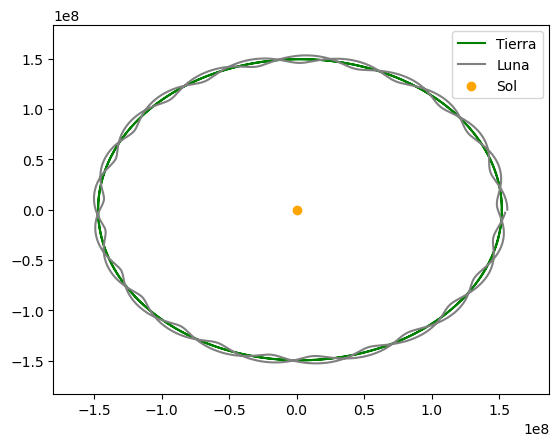

In [118]:
fig, ax = plt.subplots(1,1)
ax.plot(Tierra[0],Tierra[1], label = "Tierra", color = "green")
ax.plot(Luna[0], Luna[1], label = "Luna", color = "grey")
ax.scatter(0,0, label = "Sol", color = "orange")
ax.legend(loc = "upper right")
# Establecer los límites del gráfico
ax.set_xlim(np.min(Luna[0])*1.2,1.2*np.max(Luna[0]))  # Ajusta según la escala de tu órbita
ax.set_ylim(np.min(Luna[1])*1.2,1.2*np.max(Luna[1]))

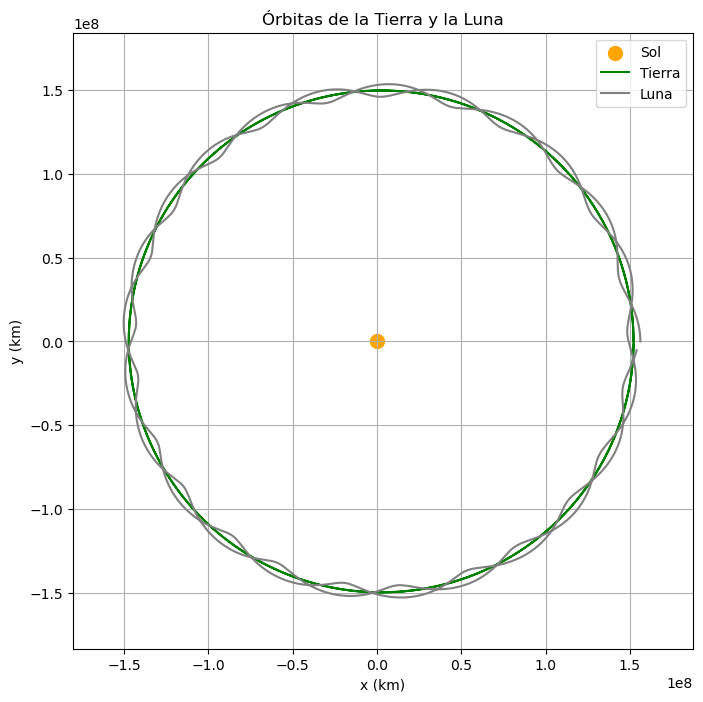

In [119]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Graficar el Sol como un punto
ax.scatter(0, 0, label="Sol", color="orange", s=100)

# Establecer los límites del gráfico
ax.set_xlim(np.min(Luna[0])*1.2,1.2*np.max(Luna[0]))  # Ajusta según la escala de tu órbita
ax.set_ylim(np.min(Luna[1])*1.2,1.2*np.max(Luna[1]))

# Etiquetas y título
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_title("Órbitas de la Tierra y la Luna")

# Inicializar las líneas para las órbitas de la Tierra y la Luna
line_tierra, = ax.plot([], [], label="Tierra", color="green")
line_luna, = ax.plot([], [], label="Luna", color="grey")

# Configurar la leyenda
ax.legend(loc="upper right")
ax.grid()

# Función de inicialización (vacía)
def init():
    line_tierra.set_data([], [])
    line_luna.set_data([], [])
    return line_tierra, line_luna

# Función para actualizar la animación en cada frame
def update(frame):
    line_tierra.set_data(Tierra[0][:frame], Tierra[1][:frame])
    line_luna.set_data(Luna[0][:frame], Luna[1][:frame])
    return line_tierra, line_luna

# Calcular FPS para que la animación dure 30 segundos
total_frames = len(Tierra[0])  # Total de fotogramas
duration_seconds = 30  # Duración deseada en segundos
fps = total_frames / duration_seconds  # Calcular FPS

# Crear la animación
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=50)

# Guardar la animación con el FPS calculado
ani.save("Tierra_Luna_animacion_geo.mp4", writer="ffmpeg", fps=np.round(fps))